imports

In [1]:
import csv
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

def plotImage(matrix):  # appropriate for weights
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.ocean,
        extent=[matrix.min(), matrix.max(), matrix[0].min(), matrix[0].max()])
    plt.colorbar()
    plt.show()

function for reading feature extracted file and clustering

In [2]:
def import_features(features_file_path, labels_file_path):
    with open(features_file_path, 'rb') as f:
        reader = csv.reader(f, delimiter=',')
        mylist = list(reader)
        data = np.asanyarray(mylist).astype(float)
    labels = []
    with open(labels_file_path,'rU') as f:
        rows = csv.DictReader(f)
        for row in rows:
            labels.append(row['Class'])
    labels = np.asarray(labels).astype(int)
    return (data,labels)

functions for distance metrics

In [3]:
from scipy.spatial.distance import pdist, squareform

def compute_all_distances(X, metric='euclidean'):
    return squareform(pdist(X, metric=metric))

def representation_metric_all_samples(dist, y):
    assert len(dist.shape) == 2 and dist.shape[0] == dist.shape[1], (
        'Distance matrix is not square!')
    within_group_distance = 0.
    between_group_distance = 0.
    num_within, num_between = 0, 0
    labels = np.unique(y)
    for label in labels:
        label_mask = y==label
        
        within_group_distance += dist[label_mask].T[label_mask].sum()
        between_group_distance += dist[label_mask].T[~label_mask].sum()
        
        num_within += label_mask.sum() * (label_mask.sum()-1) / 2
        num_between += label_mask.sum() * (~label_mask).sum()
    
    return (between_group_distance / within_group_distance 
            * num_within / num_between 
            * 2)

Toy Examples

In [166]:
X = np.array([[1], [10], [3], [5], [1], [4]])
y = np.array([1, 2, 1, 1, 3, 3])
d = compute_all_distances(X)
representation_metric_all_samples(d, y)

1.5537190082644627

In [167]:
X = np.array([[1], [10], [3]])
y = np.array([1, 2, 1])
d = compute_all_distances(X)
representation_metric_all_samples(d, y)

4.0

# Loading Extracted Features

Images

In [6]:
(data,labels) = import_features("features/images/pool_3:0.csv", "datasets/images/trainLabels.csv")

IOError: [Errno 2] No such file or directory: 'features/images/pool_3:0.csv'

Metrics For Clustering in Images

In [156]:
representation_metric_all_samples(compute_all_distances(data), labels)

1.0932644206775715

T-SNE 

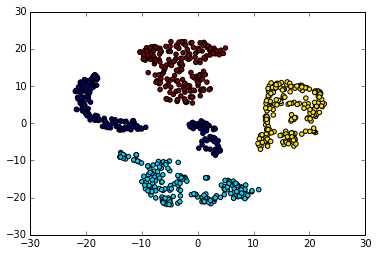

In [157]:
# T-SNE
points = tsne_model.fit_transform(data)
plt.scatter(points[:,0],points[:,1], c=labels)

In [158]:
# K-Means cluters
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(data)
r = data[np.where(kmeans_model.labels_ == 2)]
s = np.mean(r,axis=1)

In [159]:
print(sk.metrics.adjusted_rand_score(kmeans_model.labels_,labels))
print(sk.metrics.cluster.adjusted_mutual_info_score(kmeans_model.labels_,labels))
print(sk.metrics.normalized_mutual_info_score(kmeans_model.labels_,labels))
print(sk.metrics.adjusted_rand_score([0, 0, 1, 1] , [1, 1, 0, 0]))
print(sk.metrics.adjusted_rand_score([1, 1, 0, 0] , [1, 1, 0, 0]))

0.4105666448
0.543797423271
0.575966199505
1.0
1.0


Emotion

In [7]:
(data,labels) = import_features("features/emotion/pool_3:0.csv", "datasets/emotion/samples.csv")

Metrics For Clustering in Emotion

In [8]:
representation_metric_all_samples(compute_all_distances(data), labels)

1.0085323129059918

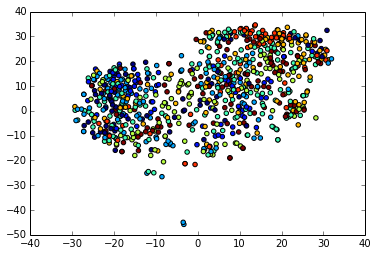

In [154]:
# T-sne on emotion data (very first result)
points = tsne_model.fit_transform(data)
plt.scatter(points[:,0],points[:,1], c=labels)

In [ ]:
#(data,labels) = import_features("features/emotion/pool_2:0.csv", "datasets/emotion/samples.csv")
#points = tsne_model.fit_transform(data)
#plt.scatter(points[:,0],points[:,1], c=labels)

In [161]:
# K-Means cluters
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(data)
r = data[np.where(kmeans_model.labels_ == 2)]
s = np.mean(r,axis=1)

In [162]:
print(sk.metrics.adjusted_rand_score(kmeans_model.labels_,labels))
print(sk.metrics.cluster.adjusted_mutual_info_score(kmeans_model.labels_,labels))
print(sk.metrics.normalized_mutual_info_score(kmeans_model.labels_,labels))

0.0320160021274
0.0516946864751
0.0707105053
